# Chapter 7. Data Visualization
> "Use a picture. It's a thousand words." - Arthur Brisbane (1911)

Covers visualization using [matplotlib](https://matplotlib.org/) and [plotly](https://plotly.com/) packages.

- 'Static 2D Plotting'
- 'Static 3D Plotting'
- 'Interactive 2D Plotting'

## Static 2D Plotting

In [4]:
# usual abbreviation "mpl" for "matplotlib"
import matplotlib as mpl

In [5]:
# Check the version of matplotlib used
mpl.__version__

'3.1.1'

In [6]:
# usual abbreviation "plt" for "matplotlib.pyplot"
import matplotlib.pyplot as plt

In [ ]:
# sets the plotting style
plt.style.use('seaborn')
# set the font to "serif" in all plots
mpl.rcParams['font.family'] = 'serif'

#### 1D Datasets
- funamental plotting function is <code>plt.plot()</code>

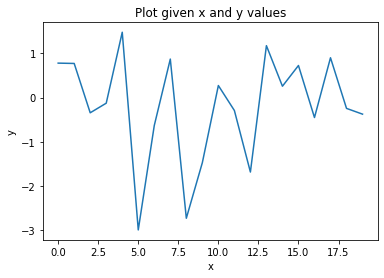

In [10]:
import numpy as np
# seed for reproducibility
np.random.seed()

# Generate standard normal x and y values
# note use of len(y)
y = np.random.standard_normal(20)
x=np.arange(len(y))

plt.title("Plot given x and y values")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y);

Plot given y values, assumes *ndarray* index is x values

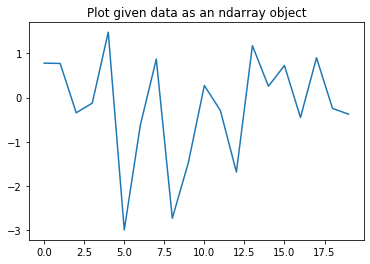

In [16]:
plt.title("Plot given data as an ndarray object")
plt.plot(y);

> NuMpy arrays and matplotlib 

.matplotlib is able to interpret an ndarray object simply by passing the method (or multiple methods) on it.

The **cumsum()** method on the **ndarray**object one gets the cumulative sum of the data.

In [17]:
y.cumsum()

array([ 0.7769402 ,  1.54645553,  1.20210216,  1.07448801,  2.54887599,
       -0.44049298, -1.0715965 , -0.20303653, -2.92904892, -4.40019244,
       -4.1291071 , -4.42187969, -6.10424453, -4.93307601, -4.67746624,
       -3.95427584, -4.40574448, -3.50730462, -3.7523851 , -4.12760079])

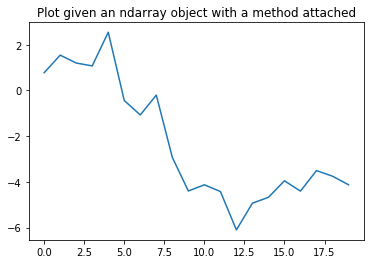

In [20]:
plt.title("Plot given an ndarray object with a method attached")
plt.plot(y.cumsum());

* Customize matplotlib
 - turn off grid <code>plt.grid(False)</code>
 - Equal scalling of two axes <code>plt.axis('equal')</code>

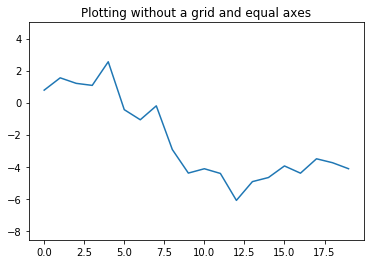

In [24]:
plt.title('Plotting without a grid and equal axes')
##################################################

plt.plot(y.cumsum())
plt.grid(False)
plt.axis('equal');

###### Options for [plt.axis()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html)

| Parameter | Description   | Show|
|------|------|------|
|   Empty  | returns current axis limits | Empty=True |
|   '*off*'  | turns axis lines & labels off|<code>plt.axis("off")</code>|
|   '*equal*'  | leads to equal scaling via dimension changes|<code>plt.axis("equal")</code>|
|   '*scaled*'  | equal scaling via dimension changes|<code>plt.axis("scaled")</code>|
|   '*tight*'  | makes all data visible , tightens limits|<code>plt.axis("tight")</code>|
|   '*image*'  | makes all data visible , with data limits|<code>plt.axis("image")</code>|
|   *[xmin, xmax, ymin, ymin]* |sets the limits to a given list of values|

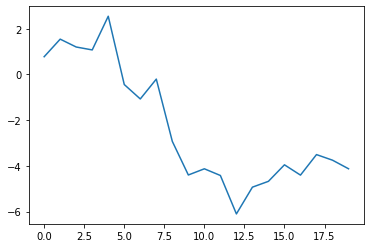

In [58]:
plt.plot(y.cumsum())

# Convenience method to get or set some axis properties.
xmin, xmax, ymin, ymax = plt.axis() 

plt.axis(Empty=True);

> To get the axis limits  

<code>xmin, xmax, ymin, ymax = plt.axis() </code>

> To set the axis limits

<code>ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax)) </code>

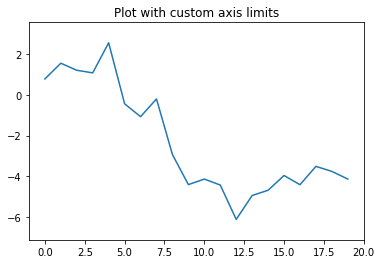

In [63]:
# Trick to make a plot with custom axes limits

plt.title("Plot with custom axis limits")
plt.plot(y.cumsum())
plt.xlim(-1, 20)
plt.ylim(np.min(y.cumsum()) - 1,
         np.max(y.cumsum()) + 1);

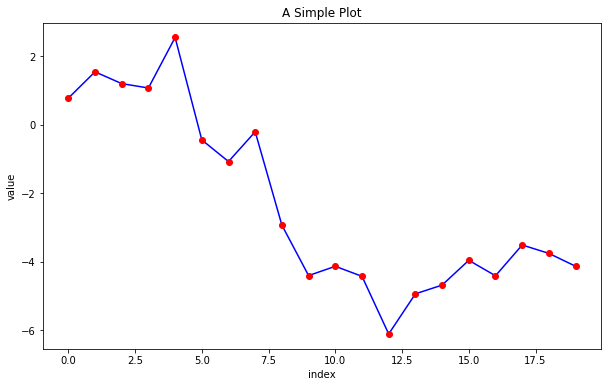

In [65]:
# Increase size of the figure
plt.figure(figsize=(10, 6))  
# Overlay blue data points with line width 1.5 apart
plt.plot(y.cumsum(), 'b', lw=1.5)  
# Overlay thick red data points with line width 1 apart
plt.plot(y.cumsum(), 'ro')  
plt.xlabel('index')  
plt.ylabel('value')  
plt.title('A Simple Plot');

#### 2D datasets

In [68]:
y = np.random.standard_normal((20, 2)).cumsum(axis=0)
y

array([[-0.69148054,  1.46330957],
       [-0.85021538,  3.23837871],
       [-1.67824202,  3.7988919 ],
       [-2.85630225,  3.33500487],
       [-1.38493871,  1.76547772],
       [-2.39665973,  2.87157708],
       [-2.28807995,  2.78996248],
       [-2.91382513,  2.04237969],
       [-1.81302531,  3.97531231],
       [-0.38565078,  2.77562603],
       [-0.10381334,  2.54804874],
       [-0.12513936,  3.39968797],
       [ 0.67008897,  1.63789919],
       [-0.06432157, -0.23766736],
       [ 0.98536214, -0.55670977],
       [ 1.55983163,  0.29647693],
       [ 1.65708749, -0.88677742],
       [ 2.80199608, -2.17587405],
       [ 1.63709502, -3.72178224],
       [-0.26743231, -3.87830866]])

One can pass this 2 dimensional array (ndarray) to <code>plt.plot()</code> . It will automatically interpret each column as a different dataset.

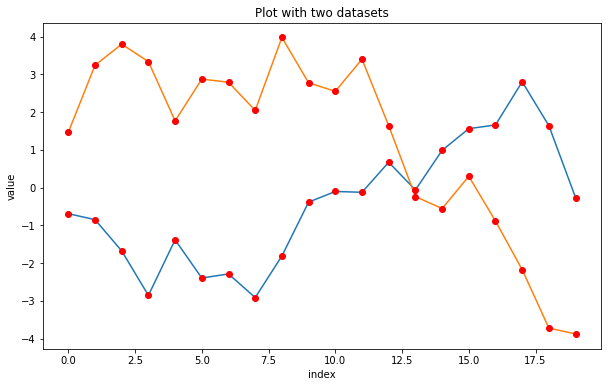

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(y, lw=1.5)
plt.plot(y, 'ro')
plt.xlabel('index')
plt.ylabel('value')
plt.title('Plot with two datasets');

In [<code>plt.legend()</code>](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.legend.html),  <code>loc=0</code> is the same as <code>loc='best'</code> .

|  Location Code <code>loc=0</code>  | Location String <code>loc='best'</code>  |
|------|------|
|0| 'best'|
|1| 'upper right'|
|2| 'upper left'|
|3| 'lower left'|
|4| 'lower right'|
|5| 'right'|
|6| 'center left'|
|7| 'center right'|
|8| 'lower center'|
|9| 'upper left'|
|10| 'center'|

* Multiple data sets with similar scaling

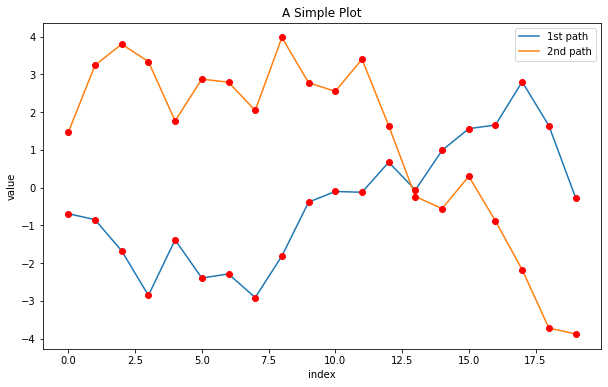

In [84]:
plt.figure(figsize=(10, 6))

# Define labels for the data subsets
plt.plot(y[:, 0], lw=1.5, label='1st path')  
plt.plot(y[:, 1], lw=1.5, label='2nd path')  

# Insert thick red  dots
plt.plot(y, 'ro')

# Insert legend
plt.legend(loc=0)  
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot');

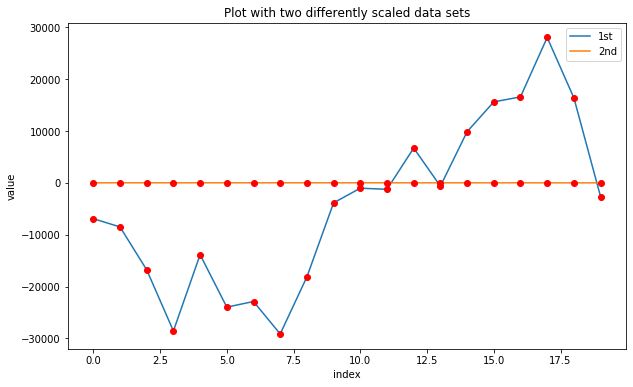

In [86]:
# Rescale the first data set
y[:, 0] = y[:, 0] * 100  

plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 1], lw=1.5, label='2nd')
plt.plot(y, 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')
plt.title('Plot with two differently scaled data sets');

After rescalling the datasets, the first data set is still visually readable, whilst the second one cannot "in a sense the second dataset gets 'visibly lost'". 

* There are two basic approaches to resolve this problem through means of plotting, as opposed to adjusting the data (e.g., through rescaling):
  - Use of two y-axes (left/right)
  - Use of two subplots (upper/lower, left/right)


Method 1:

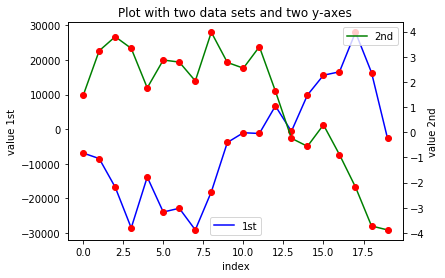

In [88]:
# Define the figure and axis objects
fig, ax1 = plt.subplots()  

plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=8)
plt.xlabel('index')
plt.ylabel('value 1st')
plt.title('Plot with two data sets and two y-axes')

# Create a second axis object that shares the x-axis
ax2 = ax1.twinx()  
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.ylabel('value 2nd');

<font color='blue'> The adding of a second axis with a different dataset is very useful, think of a line plot showing the price and a histogram showing the volume of trades.</font>

Method 2:
<code>plt.subplots()</code> function allows one to get direct access to the underlying plotting objects (figure,subplots,$\dots$).

To manage the axes, the key lines are those managing axes;
```python
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
```

<code>plt.subplots()</code> allows one to generate a second subplot that shares the same x axis as the first subplot for example.

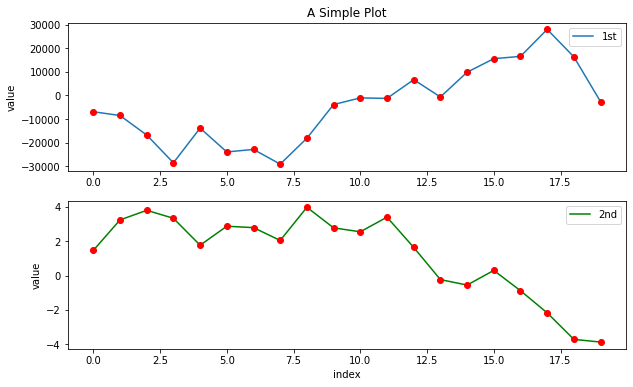

In [90]:
plt.figure(figsize=(10, 6)) 

# Defines the first subplot (upper,subplot 1)
plt.subplot(211)  
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=0)
plt.ylabel('value')
plt.title('Plot with two subplot') # Single title for both

#Defines the second subplot (lower,subplot 2)
plt.subplot(212)  
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.xlabel('index')  # Single index for both
plt.ylabel('value');

<code>plt.subplot()</code> takes in 3 integers as arguments <code>numrows</code>, <code>numcols</code> & <code>fignum</code> (separated by commas or not).


* <code>numrows</code> , &#& of rows
* <code>numcols</code> ,  &#& of cols
* <code>fignum</code>  the number of the subplots, starting with 1 and ending with (<code>numrows</code>$\times$<code>numcols</code>)


E.g. a figure with 6 equal size plots would need <code>numrows</code>$=3$ <code>numcols</code>$=2$ and <code>fignum</code>$=1,2,3,\dots,6$.

The lower-rigth subplot would have coordinates <code>plt.subplot(3,1,6)</code>

We can use <code>plt.subplot</code> to combine different types of plots that *matplotlib*

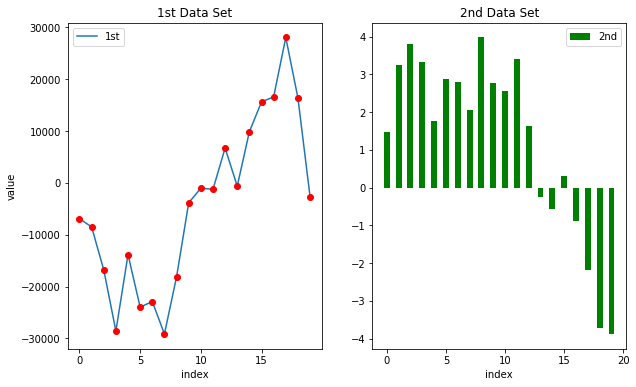

In [91]:
plt.figure(figsize=(10, 6))
# Subplot 1
plt.subplot(121)
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')
plt.title('1st Data Set')
# subplot 2
plt.subplot(122)
plt.bar(np.arange(len(y)), y[:, 1], width=0.5,
        color='g', label='2nd')  
plt.legend(loc=0)
plt.xlabel('index')
plt.title('2nd Data Set');

Above we have a plot combining line/point subplot with bar subplot.

##### Other Plot Style

1. Line Plots
2. Point plots

We could perhaps use a scatter plot to illustrate the returns of one financial time series aganist those of another. 

The following example uses a two dimensional dataset.

*  ```  import matplotlib.pyplot as plt ```
*  ```  import matplotlib as mpl ```

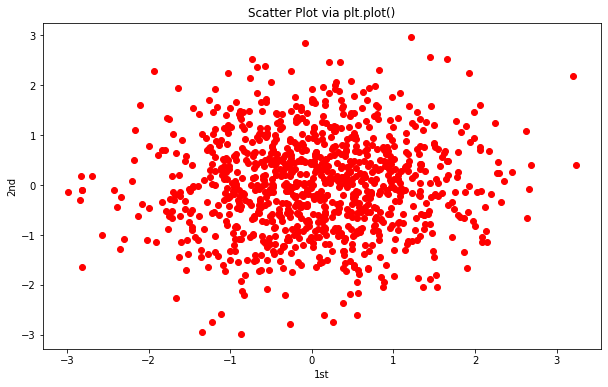

In [94]:
# Create a 2D array, (1000*2 matrix) of standard norm distributed data
y = np.random.standard_normal((1000, 2))  

# Scatter plot via plt.plot() function
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], y[:, 1], 'ro')  
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot via plt.plot()');

<code>matplotlib</code>  has a specific function for scatter plots,<code>plt.scatter()</code> It has the benefits as it allows more features. See [plt.scatter()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)

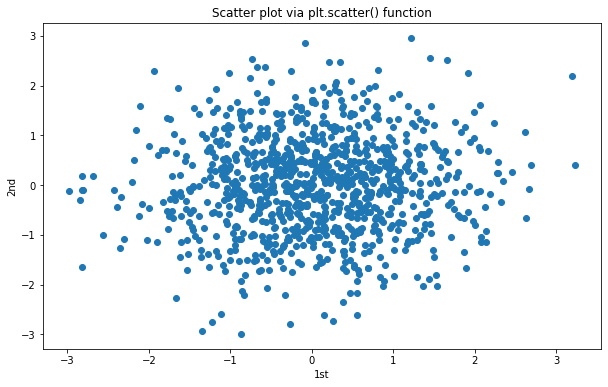

In [97]:
plt.figure(figsize=(10, 6))

# Scatter plot using plt.scatter() function
plt.scatter(y[:, 0], y[:, 1], marker='o')  
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter plot via plt.scatter() function');

 [<code>plt.scatter()</code>](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html) has the benefit of being able to add a third dimension as a new colour.
 
 We use a color bar (<code>plt.colorbar()</code>)for the third dimension and illustrate it as a different color.

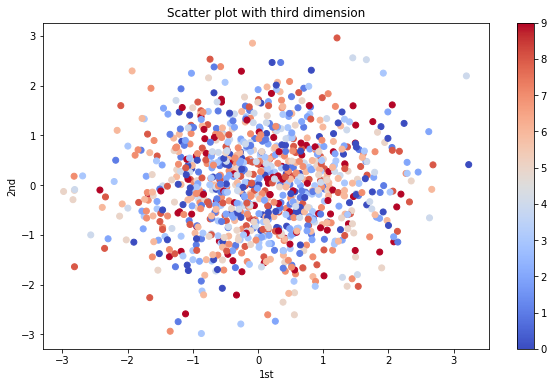

In [99]:
# Create the third dimension
c = np.random.randint(0, 10, len(y))

plt.figure(figsize=(10, 6))
         
plt.scatter(y[:, 0], y[:, 1],
            c=c,             # Includes the third dataset c
            cmap='coolwarm', # Chooses color map
            marker='o')      # Defines the marker to be a thick dot
plt.colorbar()
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter plot with third dimension');

Next, we look at plotting the histogram using <code>plt.hist()</code>

We can [<code>plt.hist()</code>](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) to plot both, either a density or frequency histogram. There are 3 different ways to plot a histogram this is just one of the possible methods, no method os best. There is just a different scenario were each method is optimal.

In [124]:
y.shape

(1000, 2)

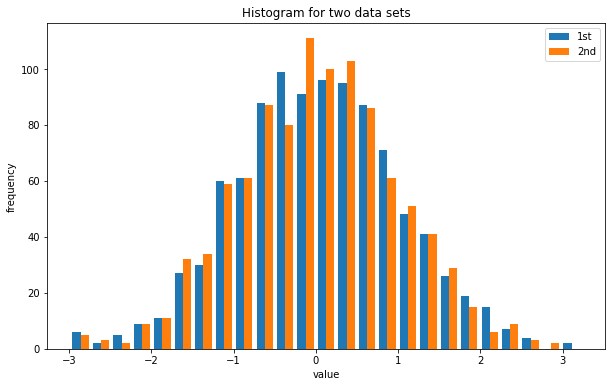

In [101]:
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], bins=25)  
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram for two data sets');

| Parameter | Description   |<code>plt.hist()</code> |
|------|------|------|
|  x  | *list* object(s) , ndarray object| y(dataset) |
| *bins* | # of bins  |<code>bins=20</code>|
| range | lower and upper range of bins  |<code>range=[-4,4]</code>
| normed | Normalizing, so the intergral value is 1  |<code>normed=True</code>
| weights | weights for every value in x (None or ndarray)  |<code>weights=None</code>|
|| a | b |c|
| a | b  |c|
| a | b  |c|
| a | b  |c|
| a | b  |c|
| a | b  |c|
| a | b  |c|
| a | b  |c|
| a | b  |c|

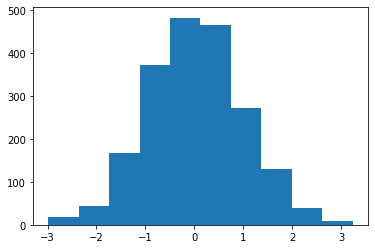

TypeError: bar() missing 1 required positional argument: 'height'

IndexError: too many indices for array

SyntaxError: invalid syntax (<ipython-input-115-195541b9880f>, line 1)